Data: https://drive.google.com/file/d/1211eIfoHmSOp74lsBklqW5UN2K3eVcNz/view

In [ ]:
import pandas as pd

df = pd.read_csv('data/data_nn.csv', names=['type', 'age', 'op_time', 'replacement'], header=0)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   type         400 non-null    str  
 1   age          400 non-null    int64
 2   op_time      400 non-null    int64
 3   replacement  400 non-null    int64
dtypes: int64(3), str(1)
memory usage: 12.6 KB


In [4]:
from sklearn import preprocessing

# --- Converting categorical text (1st column) into numerical parameters ---

label_encoder = preprocessing.LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

# Encoding reference: Single-phase = 0, Three-phase = 1

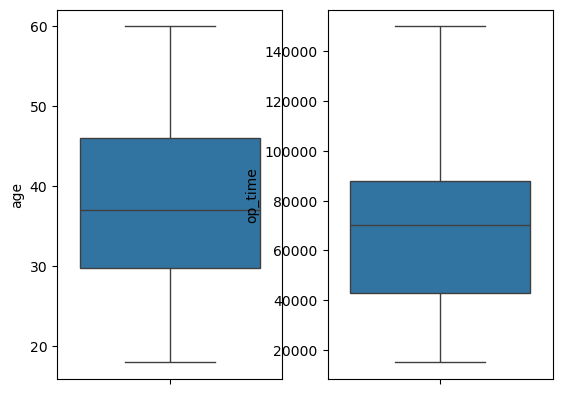

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb

# --- Outlier detection and removal ---

fig, axes = plt.subplots(1, 2)

sb.boxplot(df['age'], ax=axes[0])
sb.boxplot(df['op_time'], ax=axes[1])

plt.show()

# The plots show there are no outliers present

In [7]:
# --- Balancing the dataset ---

# Creating a new dataframe with an equal number of samples for each class (0 and 1)

n0, n1 = 0, 0
samples_per_class = 143
balanced_df = pd.DataFrame(columns=df.columns)

for i in range(len(df)):
    # Check if target is 1 and we still need more samples
    if df['replacement'][i] == 1 and n1 < samples_per_class:
        balanced_df.loc[n0 + n1] = df.iloc[i, :]
        n1 += 1
    
    # Check if target is 0 and we still need more samples
    elif df['replacement'][i] == 0 and n0 < samples_per_class:
        balanced_df.loc[n0 + n1] = df.iloc[i, :]
        n0 += 1

    # Stop once both classes are balanced
    if n1 == samples_per_class and n0 == samples_per_class:
        break

In [8]:
# --- Data Normalization ---

from sklearn.preprocessing import MaxAbsScaler
import numpy as np

# Scaling data to the range [-1, 1] or [0, 1] based on absolute maximum
scaler = MaxAbsScaler()
scaled_data = scaler.fit_transform(balanced_df)

In [9]:
# --- Splitting Data into Training and Testing Sets ---

from sklearn.model_selection import train_test_split as tts

y = scaled_data[:, 3]
X = scaled_data[:, 0:3]

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25)

In [15]:
# --- Training the Neural Network (MLP) ---

from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(3,), activation='tanh', max_iter=5000)
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        31
         1.0       0.90      0.90      0.90        41

    accuracy                           0.89        72
   macro avg       0.89      0.89      0.89        72
weighted avg       0.89      0.89      0.89        72

Confusion Matrix:
[[27  4]
 [ 4 37]]
